In [18]:
import sys
import os
import jcamp
from jcamp import jcamp_calc_xsec, jcamp_readfile

nist_ir_dataset = [
    ("InChI=1S/C6H6/c1-2-4-6-5-3-1/h1-6H", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C71432&Index=4&Type=IR"),
    ("InChI=1S/C2H4/c1-2/h1-2H2", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C74851&Index=2&Type=IR"),
    ("InChI=1S/C3H6O/c1-3(2)4/h1-2H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C67641&Index=6&Type=IR"),
    ("InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C64175&Index=5&Type=IR"),
    ("InChI=1S/CH4O/c1-2/h2H,1H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C67561&Index=4&Type=IR"),
    ("InChI=1S/C3H8O/c1-3(2)4/h3-4H,1-2H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C67630&Index=5&Type=IR"),
    ("InChI=1S/C4H8O2/c1-3-6-4(2)5/h3H2,1-2H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C141786&Index=4&Type=IR"),
    ("InChI=1S/C4H10O/c1-2-3-4-5/h5H,2-4H2,1H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C71363&Index=5&Type=IR"),
    ("InChI=1S/F6S/c1-7(2,3,4,5)6", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C2551624&Index=2&Type=IR"),
    ("InChI=1S/CF4/c2-1(3,4)5", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C75730&Index=3&Type=IR"),
    ("InChI=1S/CH3Br/c1-2/h1H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C74839&Index=3&Type=IR"),
    ("InChI=1S/C2H3N/c1-2-3/h1H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C75058&Index=4&Type=IR"),
    ("InChI=1S/C2H4O/c1-2-3-1/h1-2H2", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C75218&Index=2&Type=IR"),
    ("InChI=1S/C3H6O/c1-3-2-4-3/h3H,2H2,1H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C75569&Index=3&Type=IR"),
    ("InChI=1S/C4H8O/c1-3-4(2)5/h3H2,1-2H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C78933&Index=4&Type=IR"),
    ("InChI=1S/C6H14O/c1-5-7-6(2,3)4/h5H2,1-4H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C637923&Index=2&Type=IR"),
    ("InChI=1S/C4H6/c1-3-4-2/h3-4H,1-2H2", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C106990&Index=3&Type=IR"),
    ("InChI=1S/C3H3N/c1-2-3-4/h2H,1H2", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C107131&Index=3&Type=IR"),
    ("InChI=1S/C4H6O2/c1-3-6-4(2)5/h3H,1H2,2H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C108054&Index=4&Type=IR"),
    ("InChI=1S/C7H8/c1-7-5-3-2-4-6-7/h2-6H,1H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C108883&Index=5&Type=IR"),
    ("InChI=1S/C5H8O2/c1-3-5(6)7-4-2/h3H,1,4H2,2H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C140885&Index=4&Type=IR"),
    ("InChI=1S/C5H12O/c1-5(2,3)6-4/h1-4H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C1634044&Index=2&Type=IR"),
    ("InChI=1S/O2S/c1-3-2", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C7446095&Index=3&Type=IR"),
    ("InChI=1S/C2F6/c3-1(4,5)2(6,7)8", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C76164&Index=2&Type=IR"),
    ("InChI=1S/C2HF5/c3-1(4)2(5,6)7/h1H", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C354336&Index=1&Type=IR"),
    ("InChI=1S/CHCl3/c2-1(3)4/h1H", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C67663&Index=4&Type=IR"),
    ("InChI=1S/CCl4/c2-1(3,4)5", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C56235&Index=6&Type=IR"),
    ("InChI=1S/C2Cl4/c3-1(4)2(5)6", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C127184&Index=5&Type=IR"),
    ("InChI=1S/C4H10/c1-3-4-2/h3-4H2,1-2H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C106978&Index=3&Type=IR"),
    ("InChI=1S/C2HCl3/c3-1-2(4)5/h1H", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C79016&Index=5&Type=IR"),
    ("InChI=1S/C2H3Cl3/c3-1-2(4)5/h2H,1H2", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C79005&Index=4&Type=IR"),
    ("InChI=1S/C8H10/c1-7-5-3-4-6-8(7)2/h3-6H,1-2H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C95476&Index=4&Type=IR"),
    ("InChI=1S/C8H10/c1-7-4-3-5-8(2)6-7/h3-6H,1-2H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C108383&Index=5&Type=IR"),
    ("InChI=1S/C8H10/c1-7-3-5-8(2)6-4-7/h3-6H,1-2H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C106423&Index=6&Type=IR"),
    ("InChI=1S/C8H10/c1-2-8-6-4-3-5-7-8/h3-7H,2H2,1H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C100414&Index=5&Type=IR"),
    ("InChI=1S/C2H4Cl2/c3-1-2-4/h1-2H2", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C107062&Index=4&Type=IR"),
    ("InChI=1S/C2H3Cl3/c1-2(3,4)5/h1H3", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C71556&Index=4&Type=IR"),
    ("InChI=1S/CCl2F2/c2-1(3,4)5", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C75718&Index=3&Type=IR"),
    ("InChI=1S/CH2Cl2/c2-1-3/h1H2", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C75092&Index=4&Type=IR"),
    ("InChI=1S/C2H2Cl2/c1-2(3)4/h1H2", "https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C75354&Index=4&Type=IR"),
]

for idx in range(len(nist_ir_dataset)):
    os.system(f"wget \"{nist_ir_dataset[idx][1]}\" -O ../NistSamples/{idx}.jdx")

In [31]:
import numpy as np
nist_spectra_2_cm = []
nist_smiles = []
for idx in range(len(nist_ir_dataset)):

    spectrum_2_cm = None
    ir_spectrum = None
    
    inchi_key = nist_ir_dataset[idx][0]
    jcamp_dict = jcamp_readfile(f"../NistSamples/{idx}.jdx")

    spectrum = [0] * 10000
    for freq, intensity in zip(jcamp_dict['x'], jcamp_dict['y']):
        spectrum[int(freq)] += intensity

    spectrum = spectrum[400:4000]
    spectrum_2_cm = [0] * 1801
    for each_freq in range(1800):
        spectrum_2_cm[each_freq] += spectrum[each_freq*2] + spectrum[each_freq*2 + 1]

    spectrum_2_cm = np.array(spectrum_2_cm)/np.sum(spectrum_2_cm)
    nist_spectra_2_cm.append(spectrum_2_cm)
    import rdkit
    mol = rdkit.Chem.inchi.MolFromInchi(inchi_key)
    nist_smiles.append(rdkit.Chem.MolToSmiles(mol))
    
    # break

In [116]:
nist_dict = {}
for idx in range(len(nist_ir_dataset)):
    inchi_key = nist_ir_dataset[idx][0]
    jcamp_dict = jcamp_readfile(f"../NistSamples/{idx}.jdx")

    spectrum = [0] * 10000
    for freq, intensity in zip(jcamp_dict['x'], jcamp_dict['y']):
        spectrum[int(freq)] += intensity

    spectrum = spectrum[400:4000]
    spectrum_2_cm = [0] * 1801
    for each_freq in range(1800):
        spectrum_2_cm[each_freq] += spectrum[each_freq*2] + spectrum[each_freq*2 + 1]

    # spectrum_2_cm = np.array(spectrum_2_cm)/np.sum(spectrum_2_cm)
    nist_dict[idx] = {"inchi_key": inchi_key, "IR": spectrum_2_cm}

In [117]:
import pickle
pickle.dump(nist_dict, open("../../ir_data/nist_data.pkl", "wb"))

In [118]:
import pandas as pd

df = pd.read_pickle("../../ir_data/qm9_broad_ir.pkl")

In [119]:
qm9_smiles = []
for smi in df['SMILES'].values:
    mol = rdkit.Chem.MolFromSmiles(smi)
    qm9_smiles.append(rdkit.Chem.MolToSmiles(mol))

In [120]:
# nist_smiles

In [143]:
for i, smi in enumerate(nist_smiles):
    if smi in qm9_smiles:
        print(i, smi, qm9_smiles.index(smi), np.sum(df.iloc[qm9_smiles.index(smi)]['IR_Data']))

0 c1ccccc1 211 2.1545469101644996
2 CC(C)=O 16 1.884182510432946
3 CCO 12 2.9479415769799466
4 CO 6 2.8622118091388047
5 CC(C)O 20 2.479112219672956
6 CCOC(C)=O 262 1.511686462379352
7 CCCCO 132 3.583939269237558
9 FC(F)(F)F 182 1.0003603439758957
11 CC#N 8 1.7835107777633783
12 C1CO1 15 2.342038742902316
13 CC1CO1 42 2.350057826078838
14 CCC(C)=O 70 2.2908813096130243
15 CCOC(C)(C)C 1078 1.8485419593760781
19 Cc1ccccc1 912 2.873552847415485
21 COC(C)(C)C 227 1.99960883004599
23 FC(F)(F)C(F)(F)F 22436 1.013359929208358
28 CCCC 37 10.73493796609278
31 Cc1ccccc1C 4795 3.418672100945956
32 Cc1cccc(C)c1 4178 3.8100190845503463
33 Cc1ccc(C)cc1 4404 3.6397961198631914
34 CCc1ccccc1 5214 3.1954624342766325


In [130]:
nist_id = 2
qm9_id = 16

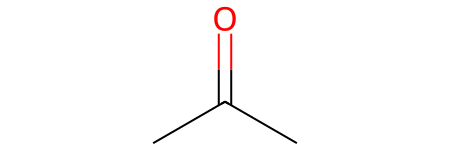

In [137]:
Chem.MolFromInchi(nist_dict[nist_id]['inchi_key'])

In [131]:
np.sum(nist_dict[nist_id]['IR'])

0.14711123017416539

In [140]:
np.sum(df.iloc[qm9_id]['IR_Data'])

1.884182510432946

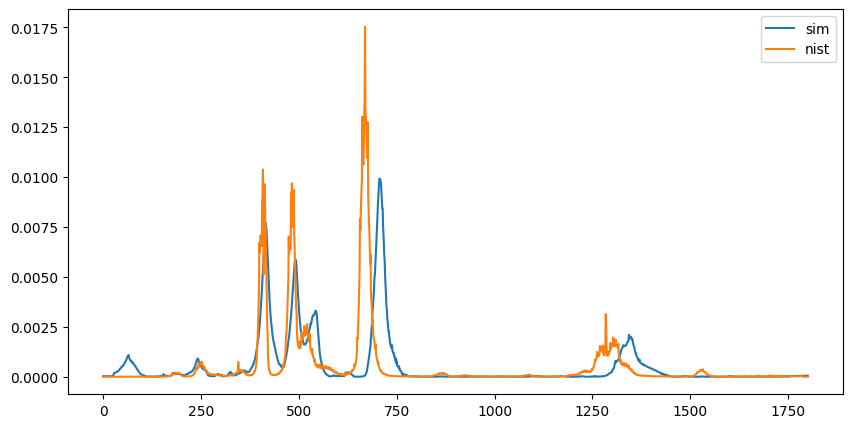

In [141]:
plt.rcParams['figure.figsize'] = [10, 5]
tmp_ir = df.iloc[qm9_id]['IR_Data'] 

# tmp_ir = tmp_ir/np.sum(tmp_ir)
plt.plot(tmp_ir /np.sum(tmp_ir), label="sim")
plt.plot(nist_dict[nist_id]['IR'] / np.sum(nist_dict[nist_id]['IR']), label="nist")
plt.legend()

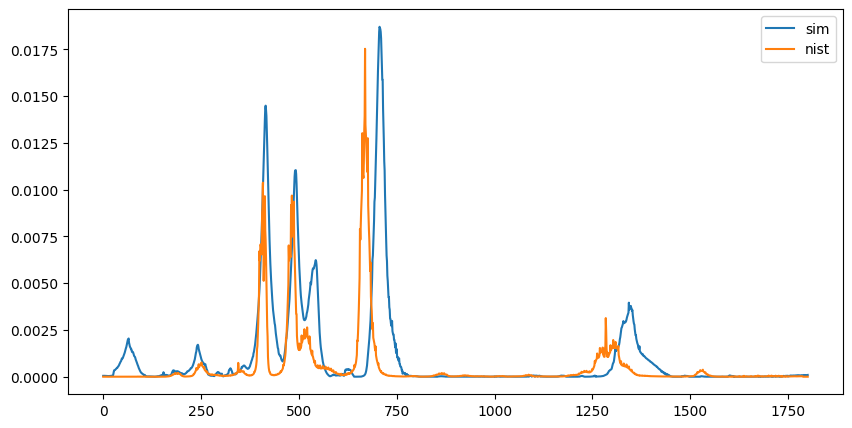

In [139]:
plt.rcParams['figure.figsize'] = [10, 5]
tmp_ir = df.iloc[qm9_id]['IR_Data'] 

# tmp_ir = tmp_ir/np.sum(tmp_ir)
plt.plot(tmp_ir , label="sim")
plt.plot(nist_dict[nist_id]['IR'] / np.sum(nist_dict[nist_id]['IR']), label="nist")
plt.legend()

In [13]:
all_datapoints = []
for i, row in df.iterrows():
    all_datapoints.append([row['SMILES'], row['Mol_Form'], row['IR_Data']])

In [14]:
import torch
from rdkit import Chem

def SIDLoss(a, b):
    # a is predicted, b is target
    a = torch.FloatTensor(a)
    b = torch.FloatTensor(b)
    threshold = 1e-8
    nan_mask=torch.isnan(b)+torch.isnan(a)
    zero_sub=torch.zeros_like(b)

    a[a < threshold] = threshold
    sum_model_spectra = torch.sum(torch.where(nan_mask,zero_sub,a))
    a = torch.div(a,sum_model_spectra)

    b[b < threshold] = threshold
    sum_target_spectra = torch.sum(torch.where(nan_mask,zero_sub,b))
    b = torch.div(b,sum_target_spectra)

    loss = torch.ones_like(b)
    a[nan_mask]=1
    b[nan_mask]=1
    loss = torch.mul(torch.log(torch.div(a,b)),a) + torch.mul(torch.log(torch.div(b,a)),b)
    loss[nan_mask]=0
    loss = torch.sum(loss)

    return loss.item()

spectra_to_plot = list()

for idx in range(len(nist_ir_dataset)):

    spectrum_2_cm = None
    ir_spectrum = None
    
    inchi_key = nist_ir_dataset[idx][0]
    jcamp_dict = jcamp_readfile(f"../NistSamples/{idx}.jdx")

    spectrum = [0] * 10000
    for freq, intensity in zip(jcamp_dict['x'], jcamp_dict['y']):
        spectrum[int(freq)] += intensity

    spectrum = spectrum[400:4000]
    spectrum_2_cm = [0] * 1801
    for each_freq in range(1800):
        spectrum_2_cm[each_freq] += spectrum[each_freq*2] + spectrum[each_freq*2 + 1]

    spectrum_2_cm = np.array(spectrum_2_cm)/np.sum(spectrum_2_cm)

    for each_datapoint in all_datapoints:
        if Chem.CanonSmiles(each_datapoint[0]) == Chem.MolToSmiles(Chem.inchi.MolFromInchi(inchi_key)):
            ir_spectrum = each_datapoint[2]
            break

    if spectrum_2_cm is None or ir_spectrum is None:
        continue
        
    spectra_to_plot.append((spectrum_2_cm, ir_spectrum))
            
    sid = SIDLoss(spectrum_2_cm, ir_spectrum)
    sis = 1.0/(1+sid)
    
    print(idx, sis, sid)


# In[133]:




0 0.11268957020508123 7.873935699462891


KeyboardInterrupt: 

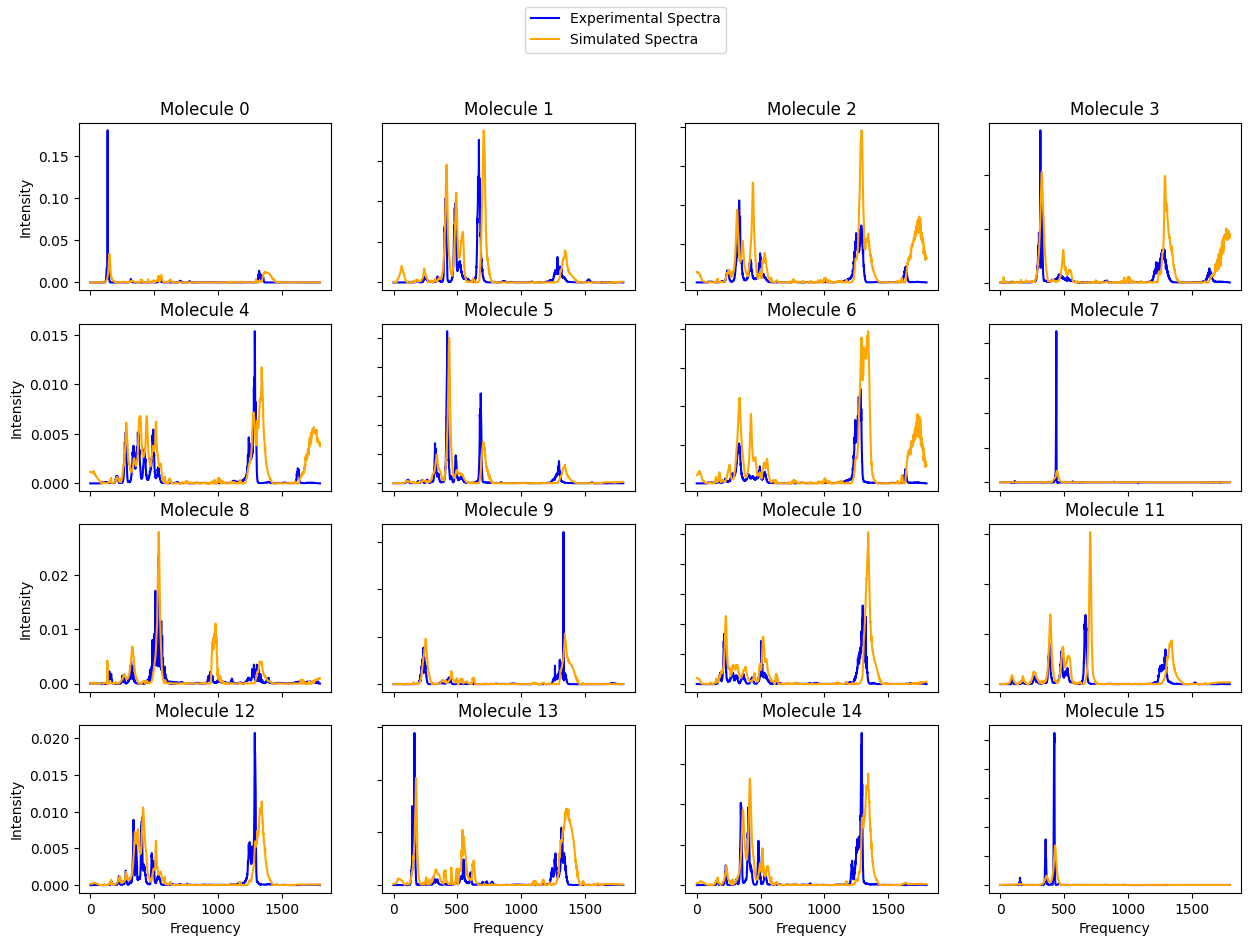

Average SIS: 0.22672394256309453


In [ ]:
import math
square_side = int(math.sqrt(len(spectra_to_plot)))
# plt.figure(figsize=(100, 100))
plt.rcParams['figure.figsize'] = [15, 10]
fig, axs = plt.subplots(square_side, square_side)

all_sis = list()

x_id = 0
y_id = 0
for idx, each_spectra_to_plot in enumerate(spectra_to_plot):
    
    if x_id == square_side or y_id == square_side:
        break

    axs[x_id, y_id].plot(each_spectra_to_plot[0], color="blue", label="Experimental Spectra")
    axs[x_id, y_id].plot(each_spectra_to_plot[1], color="orange", label="Simulated Spectra")
    axs[x_id, y_id].set_title(f'Molecule {idx}')
    
    sid = SIDLoss(each_spectra_to_plot[0], each_spectra_to_plot[1])
    sis = 1.0/(1+sid)
    all_sis.append(sis)
    
    y_id += 1
    if y_id == square_side:
        x_id += 1
        y_id = 0


for ax in axs.flat:
    ax.set(xlabel='Frequency', ylabel='Intensity')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.savefig('ir_congruence.png', dpi=300, bbox_inches = "tight")
plt.show()
print(f"Average SIS: {sum(all_sis)/len(all_sis)}")